<a href="https://colab.research.google.com/github/Vishnuvardhan172709/Aiml-/blob/main/assignment%204%20part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state= 123)

In [11]:
y_train.shape, y_test.shape,X_train.shape, X_test.shape

((4,), (1,), (4, 3), (1, 3))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
lm = LinearRegression()

In [14]:
lm.fit( X_train, y_train)

LinearRegression()

In [15]:
print("The intercept term of the Linear model:", lm.intercept_)


The intercept term of the Linear model: 3.0


In [16]:
print("The coefficient term of the Linear model:", lm.coef_)


The coefficient term of the Linear model: [ 0.   0.5 -0.5]


In [17]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
cdf

,Coefficients
const,0.0
feature1,0.5
feature2,-0.5


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
})
y = pd.Series([1, 2, 3, 4, 5])

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary to obtain the standard error and t-statistic
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.636e+30
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.05e-45
Time:                        08:58:44   Log-Likelihood:                 162.35
No. Observations:                   5   AIC:                            -320.7
Df Residuals:                       3   BIC:                            -321.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1579   5.82e-17   2.71e+15      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Sorted Coefficients:
 feature2   -0.026316
const       0.157895
feature1    0.973684
dtype: float64


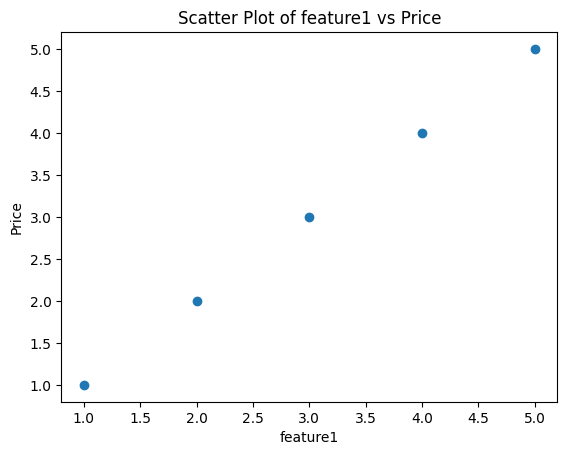

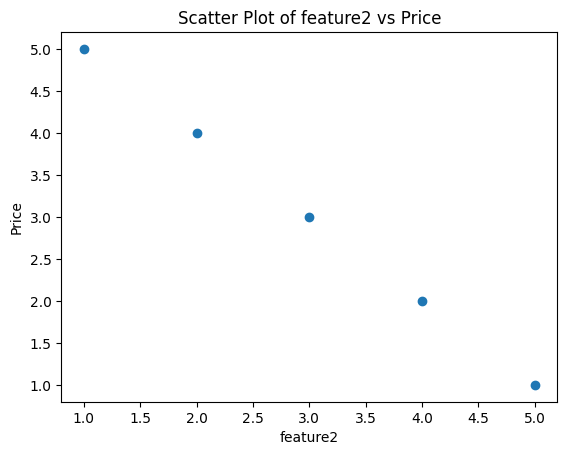

In [6]:
import matplotlib.pyplot as plt

# Sort coefficients
coefficients = model.params
sorted_coeffs = coefficients.sort_values()
print("Sorted Coefficients:\n", sorted_coeffs)

# Generate scatter plots
for feature in X.columns[1:]:  # Skip the intercept
    plt.scatter(X[feature], y)
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [7]:
from sklearn.metrics import r2_score

# Predictions
y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(y, y_pred)
print("R²:", r2)


R²: 1.0


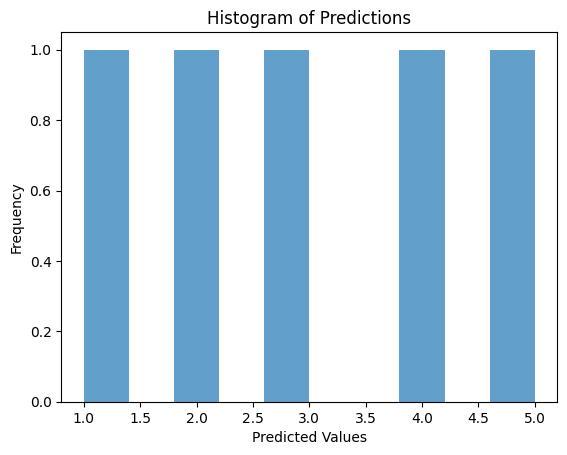

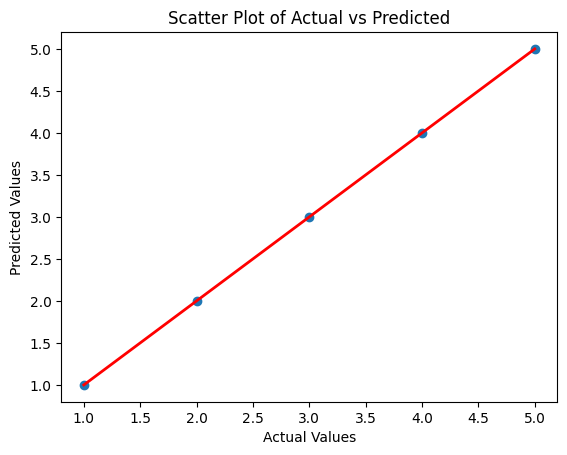

In [8]:
# Histogram of predictions
plt.hist(y_pred, bins=10, alpha=0.7)
plt.title('Histogram of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs predicted
plt.scatter(y, y_pred)
plt.title('Scatter Plot of Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Diagonal line
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# SSE
sse = np.sum((y - y_pred) ** 2)
print("Sum of Squared Errors (SSE):", sse)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# R² is already calculated above
print("R²:", r2)

Mean Absolute Error (MAE): 1.5099033134902129e-15
Sum of Squared Errors (SSE): 1.8341016046388524e-29
Root Mean Squared Error (RMSE): 1.9152553900923254e-15
R²: 1.0
